### Func predictor

#### Import libraries

In [1]:
import fastai
fastai.__version__

'1.0.27'

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
from fastai import *
from fastai.vision import *
import subprocess

#### Load data, remove ipynb checkpoints from images and create databunch

In [23]:
path = Path('data')
path.ls()

[PosixPath('data/.ipynb_checkpoints'),
 PosixPath('data/imgs'),
 PosixPath('data/models')]

In [24]:
imgs = (path / 'imgs').ls()
for folder in imgs:
    p = folder.absolute()
    subprocess.call(['rm', '-rf', str(p / '.ipynb_checkpoints')])

In [25]:
data = ImageDataBunch.from_folder(path, train='imgs', valid_pct=0.2, bs=64)

In [26]:
data.c, data.classes

(4, ['linear', 'quadratic', 'sine', 'cubic'])

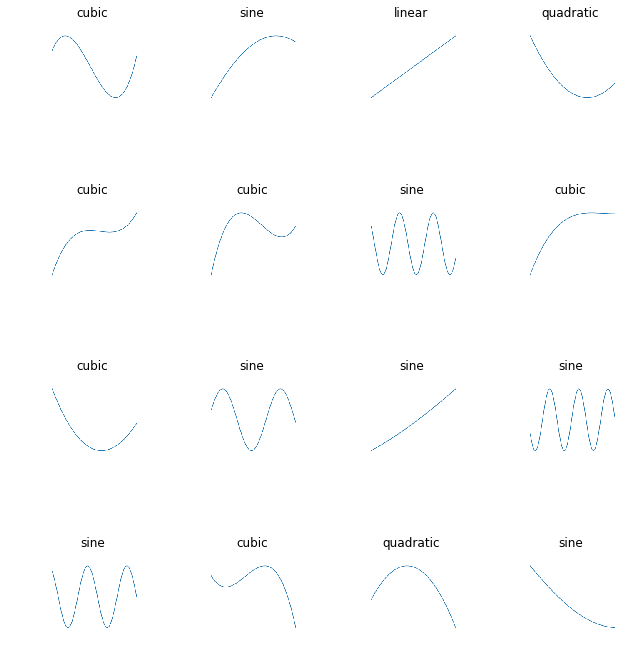

In [27]:
data.show_batch(4)

#### Create learner and train model

In [35]:
learn = create_cnn(data, models.resnet18, metrics=[error_rate, accuracy], wd=0.5, ps=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


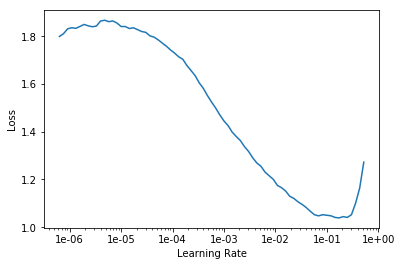

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(2, 1e-3)

Total time: 00:41
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.681902    0.778533    0.287500    0.712500  (00:20)
2      0.489524    0.295874    0.093750    0.906250  (00:20)



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


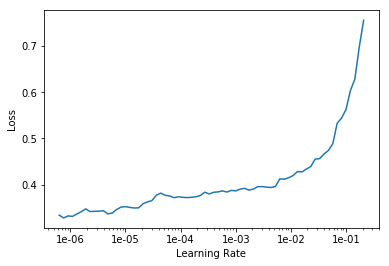

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(1, 1e-6)

Total time: 00:20
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.366100    0.292785    0.098750    0.901250  (00:20)



In [40]:
learn.fit_one_cycle(3, 1e-6)

Total time: 01:01
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.375798    0.293282    0.096250    0.903750  (00:20)
2      0.381906    0.289050    0.096250    0.903750  (00:20)
3      0.374420    0.291529    0.095000    0.905000  (00:20)



In [41]:
learn.fit_one_cycle(3, 1e-6, wd=0.25)

Total time: 01:01
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.376263    0.284981    0.091250    0.908750  (00:20)
2      0.373188    0.298875    0.098750    0.901250  (00:20)
3      0.370886    0.287952    0.091250    0.908750  (00:20)



In [42]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


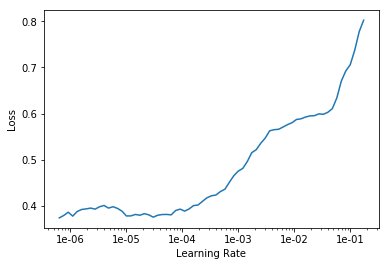

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(3, 1e-6, wd=0.5)

Total time: 01:23
epoch  train_loss  valid_loss  error_rate  accuracy
1      0.371251    0.282723    0.093750    0.906250  (00:28)
2      0.373409    0.277635    0.090000    0.910000  (00:27)
3      0.361935    0.279147    0.095000    0.905000  (00:27)



In [45]:
interp = ClassificationInterpretation.from_learner(learn)

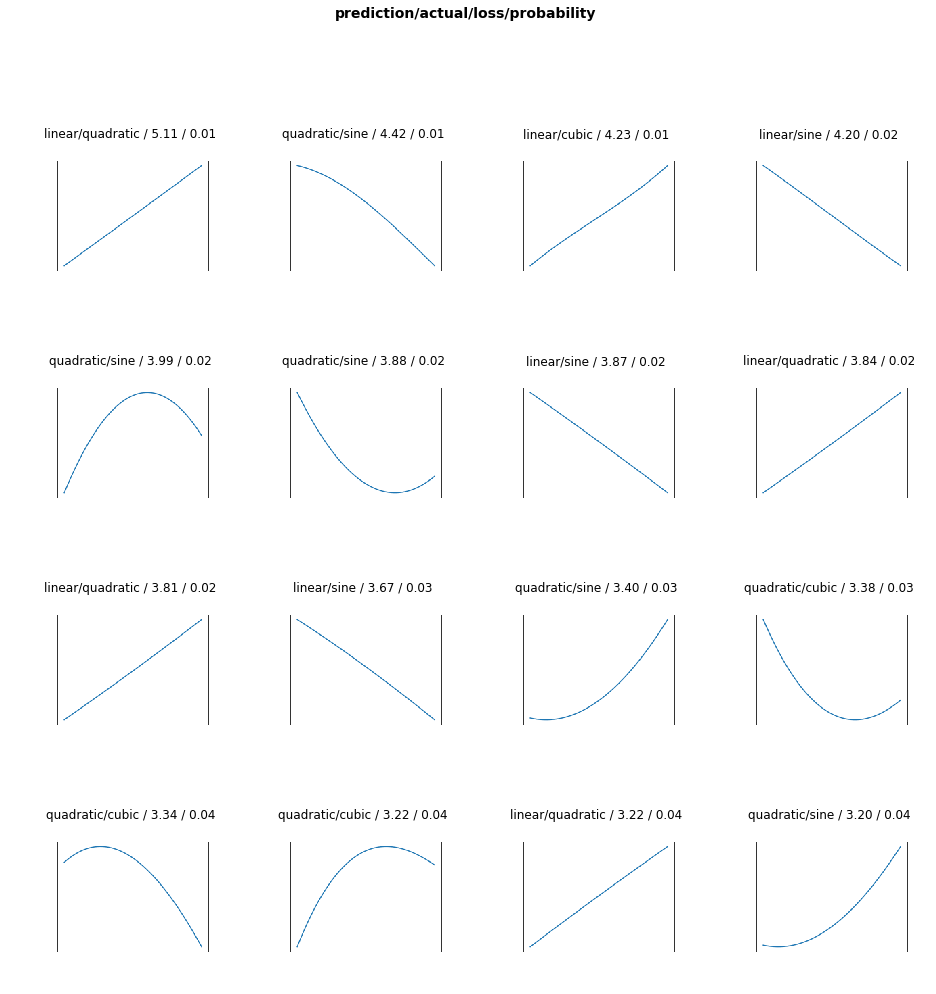

In [49]:
interp.plot_top_losses(16, figsize=(16, 16))

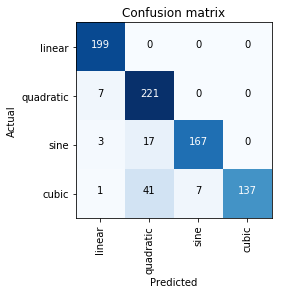

In [51]:
interp.plot_confusion_matrix()